In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [4]:
nr_squares = 20

In [5]:
# Creating the two main DataFrames

# ped_ID is an unique nr for each ped that enters the platform
# current is the unique ID of the square the ped is standing on
# goal is the unique ID of the square the pedestrian wants to go to
pedestrians = pd.DataFrame(columns = ['ped_ID', 'current_x', 'current_y', 'goal_x', 'goal_y'])

# The x and y columns are the corresponding x and y coordinates, a multi index is used
# Ped_ID is the unique ID of the ped standing on that square (If there is one on that square, otherwise it's 0)
# obstacle is a boolean that indicates if there's an obstacle on that square
squares = pd.DataFrame(columns = ['x', 'y', 'ped_ID', 'obstacle'])
x_list = nr_squares*[*range(0,nr_squares)]
y_list = []
for i in range(0, nr_squares):
    y_list.extend(nr_squares*[i])
squares['x'] = x_list
squares['y'] = y_list
squares_df = squares.set_index(['x', 'y'])
pedestrians

,ped_ID,current_x,current_y,goal_x,goal_y


In [6]:
# Create 3 pedestrians
for p in range(0 ,6):
    a = {'ped_ID': p, 'current_x' : 0, 'current_y': 0, 'goal_x' : random.randint(0, nr_squares), 'goal_y': random.randint(0, 30)}
    pedestrians = pedestrians.append(a, ignore_index=True)
pedestrians

,ped_ID,current_x,current_y,goal_x,goal_y
0,0,0,0,1,22
1,1,0,0,16,8
2,2,0,0,6,9
3,3,0,0,16,16
4,4,0,0,16,11
5,5,0,0,10,1


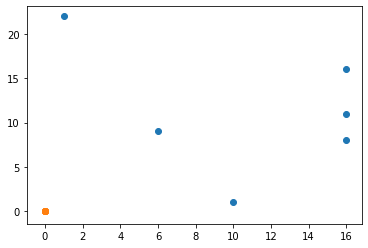

In [7]:
plt.scatter(pedestrians['goal_x'], pedestrians['goal_y'])
plt.scatter(pedestrians['current_x'], pedestrians['current_y'])

In [ ]:
for t in range(0, 3):
    if pedestrians.query('(goal_x-current_x) > 0'):
        pedestrians['current_x'] += 1
    elif pedestrians.query('(goal_x-current_x) < 0'):
        pedestrians['current'].str[0] -= 1
    if pedestrians.query('(goal_y-current_y) > 0'):
         pedestrians['current'].str[1] += 1
    elif pedestrians.query('(goal_y-current_y) < 0'):
        pedestrians['current'].str[1] -= 1
pedestrians

In [ ]:
pedestrians.query('(goal_x-current_x) > 0')